# 01. PyTorch Workflow Exercise Template

Original [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions)

In [56]:
# Import necessary libraries
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, random_split

In [57]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total. 
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [58]:
# Create the data parameters
weight = 0.3
bias = 0.9
step = 0.01

# Make X and y using linear regression feature
X = torch.arange(0,1,step).unsqueeze(1)
y = bias + weight*X

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [59]:
# Split the data into training and testing
train_len = round(0.8*len(X))
test_len = len(X) - train_len

torch.manual_seed(42)
train_data, test_data = random_split(TensorDataset(X, y), (train_len, test_len))

X_train, Y_train = train_data[:]
X_test, Y_test = test_data[:]

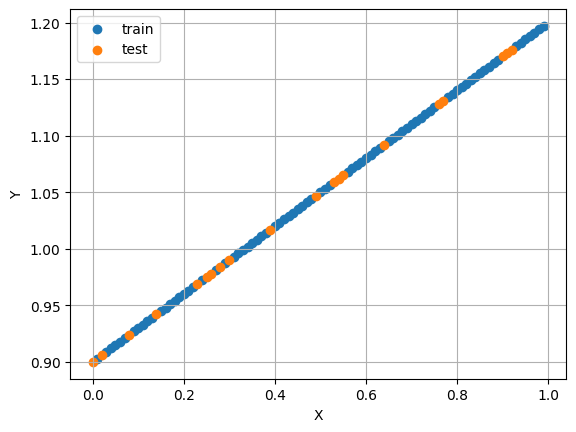

In [60]:
# Plot the training and testing data 
def plot_predictions(x_train, y_train, x_test, y_test, predictions=[]):
    plt.scatter(x_train, y_train, label="train")
    plt.scatter(x_test, y_test, label="test")
    
    if len(predictions) > 0:
        plt.scatter(x_test, predictions, label="predictions")
    
    plt.legend()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()

plot_predictions(X_train, Y_train, X_test, Y_test)

## 2. Build a PyTorch model by subclassing `nn.Module`. 
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`. 
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1. 
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [61]:
# Create PyTorch linear regression model by subclassing nn.Module

class LinearRegressionModel(nn.Module):
    """ Neural Network-based linear regression model """
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        
        self.weight = self.random_parameter()
        self.bias = self.random_parameter()

    def forward(self, X:torch.tensor):
        """Linear regression model forward pass function """
        return self.bias + self.weight * X

    def random_parameter(self):
        """ Method to initialize a random nn parameter"""
        return nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    

In [62]:
# Instantiate the model and put it to the target device
torch.manual_seed(42)
lrm = LinearRegressionModel()
lrm.to(device)

LinearRegressionModel()

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively. 
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [63]:
# Create the loss function and optimizer
loss_function = nn.L1Loss()
optimizer = torch.optim.SGD(lrm.parameters(), lr=0.01)

In [64]:
# Training loop

# Train model for 300 epochs
epochs = 300

# Send data to target device
X_train.to(device)
Y_train.to(device)

for epoch in range(epochs):
  ### Training

  # Put model in train mode
  lrm.train()

  # 1. Forward pass
  Y_pred = lrm(X_train)

  # 2. Calculate loss
  loss = loss_function(Y_pred, Y_train)

  # 3. Zero gradients
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Perform testing every 20 epochs
  if epoch % 20 == 0:

    # Put model in evaluation mode and setup inference context 
    lrm.eval()
    with torch.inference_mode():
      # 1. Forward pass
      Y_pred = lrm(X_test)

      # 2. Calculate test loss
      test_loss = loss_function(Y_pred, Y_test)

      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 0.753 | Test loss: 0.742
Epoch: 20 | Train loss: 0.501 | Test loss: 0.497
Epoch: 40 | Train loss: 0.250 | Test loss: 0.252
Epoch: 60 | Train loss: 0.086 | Test loss: 0.097
Epoch: 80 | Train loss: 0.072 | Test loss: 0.078
Epoch: 100 | Train loss: 0.062 | Test loss: 0.067
Epoch: 120 | Train loss: 0.052 | Test loss: 0.056
Epoch: 140 | Train loss: 0.043 | Test loss: 0.046
Epoch: 160 | Train loss: 0.033 | Test loss: 0.035
Epoch: 180 | Train loss: 0.024 | Test loss: 0.025
Epoch: 200 | Train loss: 0.014 | Test loss: 0.015
Epoch: 220 | Train loss: 0.004 | Test loss: 0.004
Epoch: 240 | Train loss: 0.007 | Test loss: 0.006
Epoch: 260 | Train loss: 0.007 | Test loss: 0.006
Epoch: 280 | Train loss: 0.007 | Test loss: 0.006


## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [65]:
# Make predictions with the model
lrm.eval()
with torch.inference_mode():
    Y_pred = lrm(X_test)

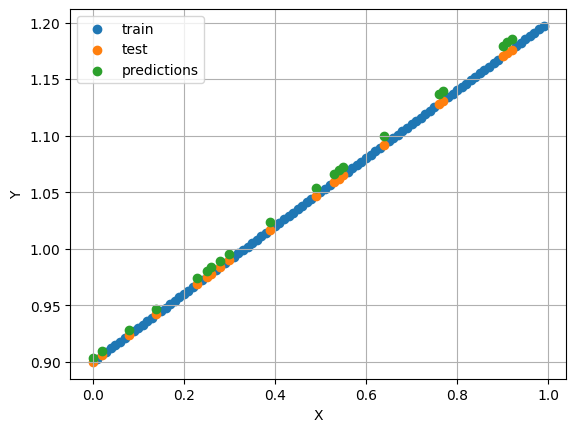

In [75]:
# Plot the predictions (these may need to be on a specific device)
default_dataset = [X_train, Y_train, X_test, Y_test]
to_cpu = lambda Z:  [d.to("cpu") for d in default_dataset + [Z]]
plot_predictions(*to_cpu(Y_pred))

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [68]:
from pathlib import Path

# 1. Create models directory 
MODEL_DIR = Path("models", exists_ok=True)
MODEL_NAME = "01_pytorch_workflow_exercises_lrm.pth"

# 2. Create model save path 
MODEL_SAVE_PATH = MODEL_DIR / MODEL_NAME

# 3. Save the model state dict
torch.save(obj=lrm.state_dict(), f=MODEL_SAVE_PATH)

In [70]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
lrm_loaded = LinearRegressionModel()
lrm_loaded.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

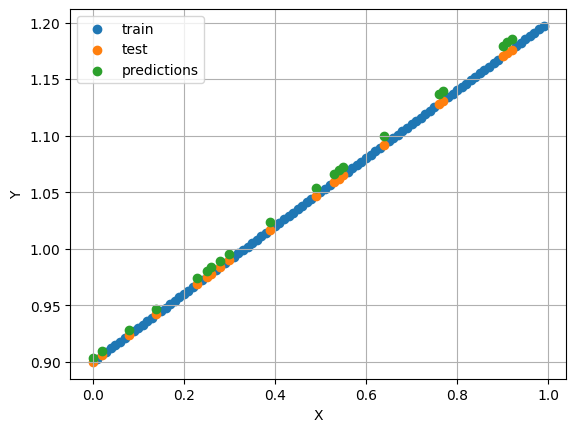

In [76]:
# Make predictions with loaded model and compare them to the previous
lrm_loaded.eval()
with torch.inference_mode():
    Y_pred_loaded = lrm_loaded(X_test)

plot_predictions(*to_cpu(Y_pred_loaded))
